In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from keras.layers import Dense,Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt


In [20]:
df = pd.read_csv('../../DL/assignment1/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [22]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
df.corr()['medv'].sort_values()

lstat     -0.737663
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
chas       0.175260
dis        0.249929
b          0.333461
zn         0.360445
rm         0.695360
medv       1.000000
Name: medv, dtype: float64

In [24]:
X = df.iloc[:,df.columns != 'medv'].values
y = df.iloc[:,df.columns == 'medv'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.25, random_state=45)


In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
model = Sequential(layers=[Dense(128,activation='relu',input_shape=(13,)),Dense(64,activation='relu'),Dense(1,activation='linear')])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model.fit(X_train,y_train, epochs=100, verbose='auto', validation_split=0.05)

Epoch 1/100
12/12 [==============================] - 0s 6ms/step - loss: 552.1339 - mae: 21.7894 - val_loss: 399.2448 - val_mae: 17.1613
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 469.5218 - mae: 19.8624 - val_loss: 322.1856 - val_mae: 14.7342
Epoch 3/100
12/12 [==============================] - 0s 2ms/step - loss: 366.8705 - mae: 17.2292 - val_loss: 233.9991 - val_mae: 12.4863
Epoch 4/100
12/12 [==============================] - 0s 2ms/step - loss: 246.5260 - mae: 13.5325 - val_loss: 151.0781 - val_mae: 9.6181
Epoch 5/100
12/12 [==============================] - 0s 2ms/step - loss: 133.2851 - mae: 9.3891 - val_loss: 107.9382 - val_mae: 8.7856
Epoch 6/100
12/12 [==============================] - 0s 2ms/step - loss: 80.0006 - mae: 6.9147 - val_loss: 89.8007 - val_mae: 8.3112
Epoch 7/100
12/12 [==============================] - 0s 2ms/step - loss: 58.0331 - mae: 5.7902 - val_loss: 60.4484 - val_mae: 6.7415
Epoch 8/100
12/12 [==============================] -

In [28]:
mse_nn,mae_nn = model.evaluate(X_test,y_test)
y_pred = model.predict(X_test)
print('Mean Squared Error: ', mse_nn)
print('Mean Absolute Error: ', mae_nn)
print('R2 Score:', r2_score(y_test,y_pred)*100)


4/4 [==============================] - 0s 543us/step
Mean Squared Error:  13.983820915222168
Mean Absolute Error:  2.707658052444458
R2 Score: 86.19932173705418


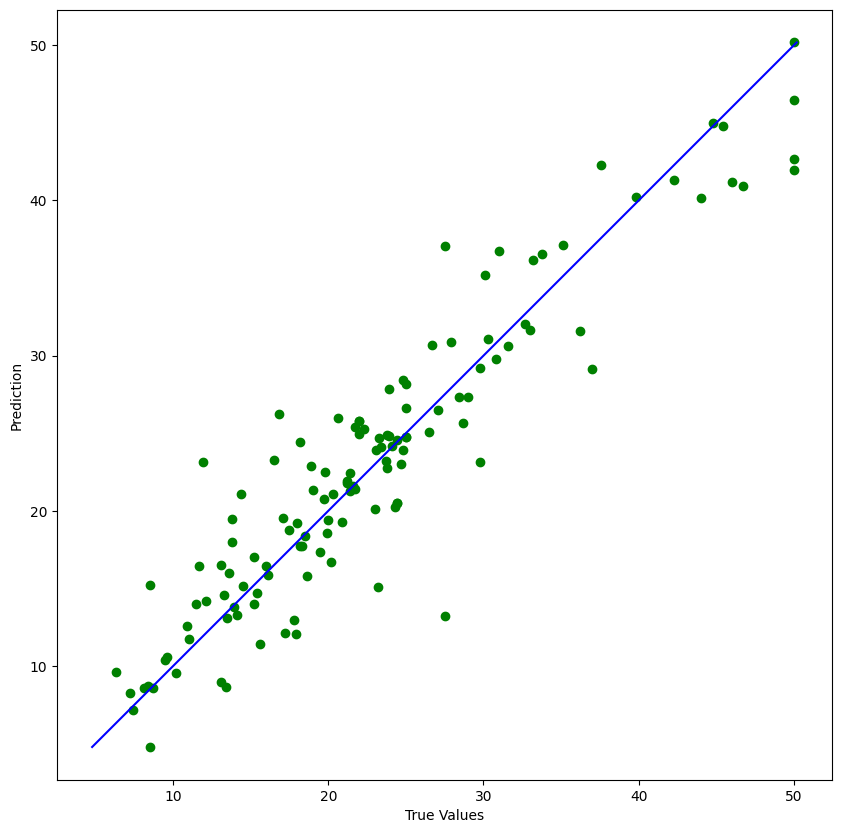

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, c='green')
p1 = max(max(y_pred),max(y_test))
p2 = min(min(y_pred),min(y_test))
plt.plot([p1,p2],[p1,p2], 'b-')
plt.xlabel('True Values')
plt.ylabel('Prediction')
plt.axis('equal')
plt.show()